# 📺 광고 매체에 따른 판매량 예측

### 📥 라이브러리 준비

> 적절한 커널을 선택한 뒤에 실행하세요. 

In [37]:
! python -m pip install -U pip
! pip install pandas scikit-learn matplotlib seaborn

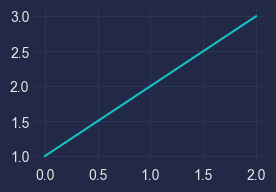

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thanks to **dhaitz**!
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
pd.Series([1, 2, 3]).plot(figsize=(3, 2))

plt.show()

# .ipynb 커널에서는 plt가 항상 자동으로 표시됩니다. 
# 10번 줄은 수동으로 표시하는 함수라서 .py 파일 내에서는 필요할 수 있지만 여기서는 생략해도 됩니다.
# 10번 줄을 없애면 8번 줄의 반환값이 추가로 표시되기 때문에 못생겨집니다.
# 이걸 없애고 싶다면 plt.show()를 다시 쓰거나, pass로 대체하면 됩니다.
# 또는 8번줄 맨 뒤에 세미콜론을 붙여도 결과가 출력되는 것을 막을 수 있습니다.

### 📚 데이터 불러오기

In [39]:
# df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/advertising.csv')
df = pd.read_csv('./data/advertising.csv')
display(df.head())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### 🔍 데이터 이해하기

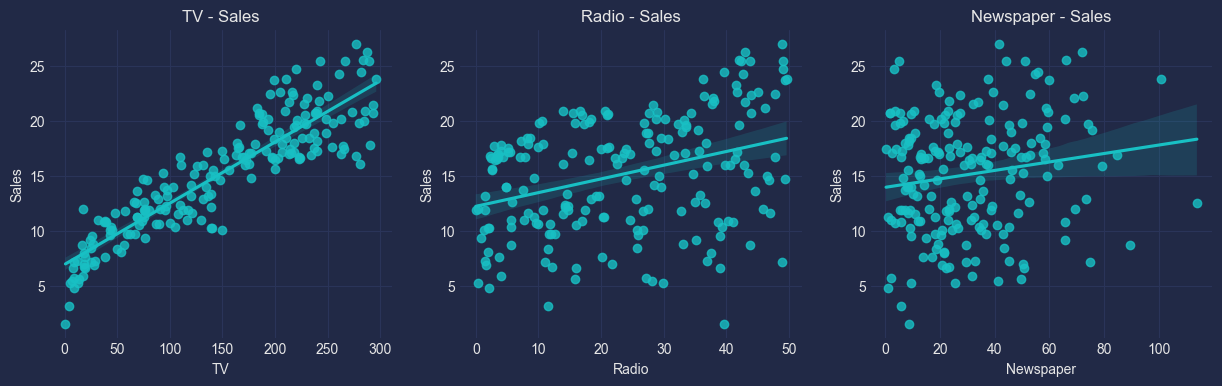

In [40]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title('TV - Sales')
sns.regplot(data=df, x='TV', y='Sales')

plt.subplot(1, 3, 2)
plt.title('Radio - Sales')
sns.regplot(data=df, x='Radio', y='Sales')

plt.subplot(1, 3, 3)
plt.title('Newspaper - Sales')
sns.regplot(data=df, x='Newspaper', y='Sales')
plt.show()


#### 🧲 상관계수

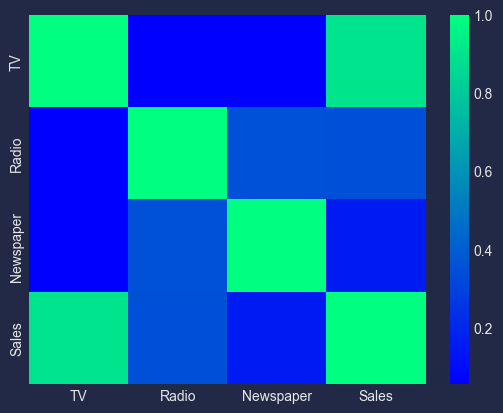

In [41]:
sns.heatmap(df.corr(), cmap='winter')
# 상관계수 행렬을 히트맵으로 표시합니다.
# 밝은 색일수록 더 상관계수가 높습니다.
# 데이터에 열이 많아질 수록, 각 열의 상관계수를 한 눈에 보기 좋겠죠?

plt.show()

### 🔗 선형 회귀; Linear Regression
TV 광고량으로부터 Sales를 예측하는 선형 회귀입니다.

#### 🎚️ 독립변수와 종속변수

In [42]:
X = df[['TV']]  
y = df['Sales']

# X: 독립 변수, 입력 변수, Feature(자질). X를 대문자로 쓰는게 관행이라는데, 저는 불호에요.
# y: 종속 변수, 출력 변수

#### ✂️ 데이터셋 분할

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.75)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 1), (50, 1), (150,), (50,))

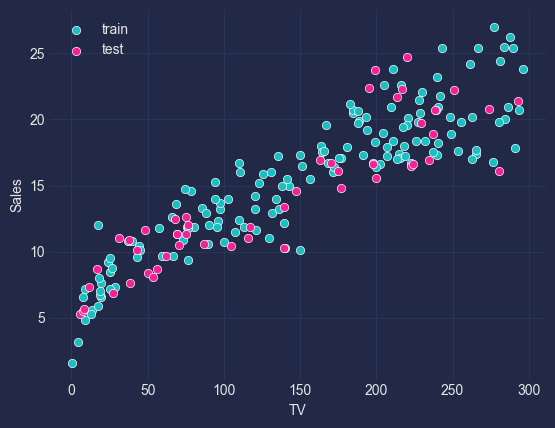

In [44]:
# 선점도 표시
sns.scatterplot(x=X_train['TV'], y=y_train, label='train')
sns.scatterplot(x=X_test['TV'], y=y_test, label='test')
plt.show()

#### 🧠 모델 생성 및 학습

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.values, y_train)

# X_train을 그대로 사용하면 DataFrame의 메타데이터가 모델에 전달됩니다.
# 이후 추론에 사용할 때마다 이 메타데이터 이름과 입력이 맞지 않으면 UserWarning을 발생시켜요.
# 이게 거슬리기 때문에 X_train.values를 사용해 값만 전달하고 있습니다.

LinearRegression()

#### ☑️ 테스트

In [46]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

pred = model.predict(X_test.values)

# 오차 계산을 위한 라이브러리 함수들
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(
    f'MSE\t: {mse:.2f}\n'
    f'RMSE\t: {rmse:.2f}\n'
    f'MAE\t: {mae:.2f}\n'
    f'R2\t: {r2:.2f}'
)

MSE	: 5.51
RMSE	: 2.35
MAE	: 1.87
R2	: 0.80


In [47]:
df_pred = pd.DataFrame({
    'X_test': X_test['TV'],
    'y_test': y_test,
    'y_pred': pred
})
df_pred['error'] = df_pred['y_test'] - df_pred['y_pred']

df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [48]:
# 오차 계산을 수동으로 하는 방법

mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)

rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r2 = 1 - (rss / tss)

print(
    f'MSE\t: {mse:.2f}\n'
    f'RMSE\t: {rmse:.2f}\n'
    f'MAE\t: {mae:.2f}\n'
    f'R2\t: {r2:.2f}'
)

MSE	: 5.51
RMSE	: 2.35
MAE	: 1.87
R2	: 0.80


#### 📈 회귀식 분석

In [49]:
print(
    f'회귀계수\t: {model.coef_}\n'
    f'절편\t\t: {model.intercept_}\n'
    f'회귀식\t\t: y = ', end=''
)

for i, coef in enumerate(model.coef_):
    print(f'{coef:.4f} * x_{i} + ', end='')
print(f'{model.intercept_:.4f}')

회귀계수	: [0.05538653]
절편		: 7.098853680118275
회귀식		: y = 0.0554 * x_0 + 7.0989


#### 🖼️ 예측 데이터 시각화

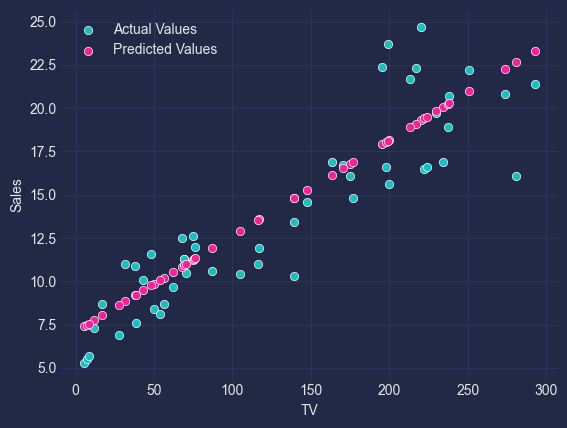

In [50]:
sns.scatterplot(x=X_test['TV'], y=y_test, label='Actual Values')
sns.scatterplot(x=X_test['TV'], y=pred, label='Predicted Values')
plt.show()

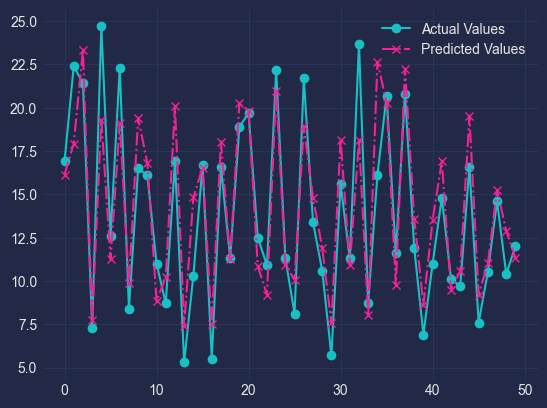

In [51]:
plt.plot(y_test.values, '-o', label='Actual Values')
plt.plot(pred, '-.x', label='Predicted Values')
plt.legend()

plt.show()

#### ❓ 모델 사용

In [52]:
tv_ads_budget = 300
sales_pred = model.predict([[tv_ads_budget]])[0]

print(
    f'TV 광고 예산\t: {tv_ads_budget}\n'
    f'매출 증가\t: {sales_pred:.4f} (추정)'
)

TV 광고 예산	: 300
매출 증가	: 23.7148 (추정)


### ⛓️ 다중 회귀; Multiple Regression

#### 📦 데이터 준비(빠르게)

In [53]:
X2 = df[['TV', 'Radio', 'Newspaper']]
y2 = df['Sales']

##### 📐 독립변수 스케일링
입력 데이터가 여러 열로 구성되어 있으면 스케일링을 해주는 것이 좋습니다.
스케일러에는 여러 종류가 있는데, 자세한 건 사진을 참고하세요.  
[<img width="500" src="../resources/scailing.png">]()

In [54]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2.values)

In [55]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, random_state=42, train_size=0.75)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((150, 3), (50, 3), (150,), (50,))

#### 🧠 모델 생성, 학습, 테스트

In [56]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [57]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

pred_2 = model2.predict(X2_test)

# 오차 계산 해줘
mse_2 = mean_squared_error(y2_test, pred_2)
rmse_2 = root_mean_squared_error(y2_test, pred_2)
mae_2 = mean_absolute_error(y2_test, pred_2)
r2_2 = r2_score(y2_test, pred_2)

print(
    f'MSE\t: {mse_2:.2f}\n'
    f'RMSE\t: {rmse_2:.2f}\n'
    f'MAE\t: {mae_2:.2f}\n'
    f'R2\t: {r2_2:.2f}'
)

MSE	: 2.40
RMSE	: 1.55
MAE	: 1.12
R2	: 0.91


In [58]:
df_pred_2 = pd.concat([
    pd.DataFrame(X2_test, columns=['TV', 'Radio', 'Newspaper']),
    pd.DataFrame({
        'y2_test': y2_test,
        'y2_pred': pred_2
    }).reset_index(drop=True)], axis=1
)
df_pred_2['error'] = df_pred_2['y2_test'] - df_pred_2['y2_pred']

df_pred_2.head(10)

,TV,Radio,Newspaper,y2_test,y2_pred,error
0,0.189837,0.562876,1.028627,16.9,17.040412,-0.140412
1,0.564665,1.650006,1.028627,22.4,20.399644,2.000356
2,1.703160,0.340049,0.582118,21.4,23.747401,-2.347401
3,-1.580378,0.920751,0.674182,7.3,9.256532,-1.956532
4,0.855419,1.737786,-1.259154,24.7,21.675259,3.024741
5,-0.840064,0.792457,1.019421,12.6,12.561793,0.038207
6,0.814550,1.393416,-0.154391,22.3,21.078657,1.221343
7,-1.133153,-0.787595,-0.559471,8.4,8.708955,-0.308955
8,0.879940,-1.341288,-0.803439,16.5,17.283536,-0.783536
9,0.327624,-0.051588,0.043546,16.1,16.684919,-0.584919


In [59]:
# 오차 계산을 수동으로 2트

mae_2 = abs(df_pred_2['error']).mean()
mse_2 = np.square(df_pred_2['error']).mean()
rmse_2 = np.sqrt(mse_2)

rss_2 = np.square(df_pred_2['y2_test'] - df_pred_2['y2_pred']).sum()
tss_2 = np.square(df_pred_2['y2_test'] - df_pred_2['y2_test'].mean()).sum()
r2_2 = 1 - (rss_2 / tss_2)

print(
    f'MSE\t: {mse_2:.2f}\n'
    f'RMSE\t: {rmse_2:.2f}\n'
    f'MAE\t: {mae_2:.2f}\n'
    f'R2\t: {r2_2:.2f}'
)

MSE	: 2.40
RMSE	: 1.55
MAE	: 1.12
R2	: 0.91


#### 📈 회귀식 분석

In [60]:
print(
    f'회귀계수\t: {model2.coef_}\n'
    f'절편\t\t: {model2.intercept_}\n'
    f'회귀식\t\t: y = ', end=''
)

for i, coef in enumerate(model2.coef_):
    print(f'{coef:.4f} * x_{i} + ', end='')
print(f'{model2.intercept_:.4f}')

회귀계수	: [4.67709227 1.4774023  0.09352121]
절편		: 15.22473459736965
회귀식		: y = 4.6771 * x_0 + 1.4774 * x_1 + 0.0935 * x_2 + 15.2247


#### 🖼️ 예측 데이터 시각화

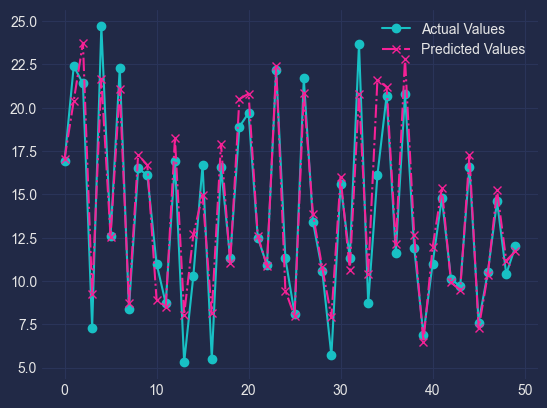

In [61]:
plt.plot(y2_test.values, '-o', label='Actual Values')
plt.plot(pred_2, '-.x', label='Predicted Values')
plt.legend()

plt.show()

#### ❓ 모델 사용

In [62]:
tv_ads_budget = 300
radio_ads_budget = 50
newspaper_ads_budget = 70

# 모델 학습하기 전에 사용했던 그 스케일러를 또 사용했습죠.
scaled = scaler2.transform([[tv_ads_budget, radio_ads_budget, newspaper_ads_budget]])

sales_pred_2 = model2.predict(scaled)[0]

print(
    f'TV 광고 예산\t: {tv_ads_budget}\n'
    f'라디오 광고 예산: {radio_ads_budget}\n'
    f'뉴스 광고 예산\t: {newspaper_ads_budget}\n'
    f'매출 증가\t: {sales_pred_2:.4f} (추정)'
)

TV 광고 예산	: 300
라디오 광고 예산: 50
뉴스 광고 예산	: 70
매출 증가	: 26.4153 (추정)


### 🖇️ 다항 회귀; Polynomial Regression

#### 📦 데이터 준비(빠르게)

In [63]:
X3 = df[['TV', 'Radio', 'Newspaper']]
y3 = df['Sales']

##### 🪢 다항-화

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

X3_poly = poly.fit_transform(X3.values)
X3_poly.shape

(200, 20)

In [65]:
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3_poly)

In [66]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, random_state=42, train_size=0.75)
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

((150, 20), (50, 20), (150,), (50,))

#### 🧠 모델 생성, 학습, 테스트

In [67]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

In [68]:
pred_3 = model3.predict(X3_test)

# R2 스코어만 확인
train_r2_3 = model3.score(X3_train, y3_train)
test_r2_3 = model3.score(X3_test, y3_test)

print(
    f'Train R2: {train_r2_3}\n'
    f'Test R2\t: {test_r2_3}'
)

Train R2: 0.9363844104766007
Test R2	: 0.9362258487284236


#### 🖼️ 예측 데이터 시각화

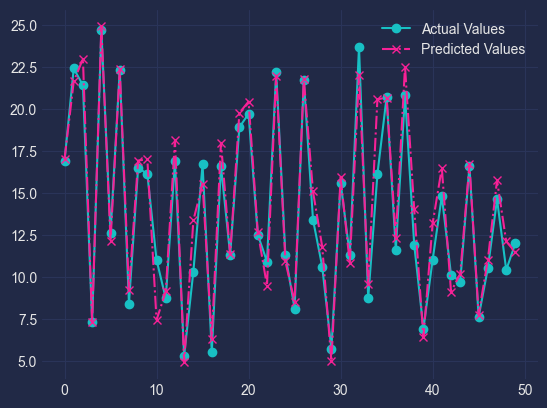

In [69]:
plt.plot(y3_test.values, '-o', label='Actual Values')
plt.plot(pred_3, '-.x', label='Predicted Values')
plt.legend()

plt.show()

### 🚧 규제: Ridge

#### 📦 데이터 준비

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X4 = df[['TV', 'Radio', 'Newspaper']]
y4 = df['Sales']

poly4 = PolynomialFeatures(degree=4)
X4_poly = poly4.fit_transform(X3.values)
X4_poly.shape

scaler4 = StandardScaler()
X4_scaled = scaler4.fit_transform(X4_poly)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4_scaled, y4, random_state=42, train_size=0.75)
X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape

((150, 35), (50, 35), (150,), (50,))

#### 🧠 모델 생성, 학습, 테스트

In [71]:
from sklearn.linear_model import Ridge

model4 = Ridge(alpha=0.05)
model4.fit(X4_train, y4_train)

pred_4 = model4.predict(X4_test)

train_r2_4 = model4.score(X4_train, y4_train)
test_r2_4 = model4.score(X4_test, y4_test)

print(
    f'Train R2: {train_r2_4}\n'
    f'Test R2\t: {test_r2_4}'
)

Train R2: 0.9437774301351404
Test R2	: 0.9318693680723773


### 🚧 규제: Lasso
직전의 데이터를 그대로 쓰겠습니다.

#### 🧠 모델 생성, 학습, 테스트

In [72]:
from sklearn.linear_model import Lasso

model5 = Lasso(alpha=0.05)
model5.fit(X4_train, y4_train)

pred_5 = model5.predict(X4_test)

train_r2_5 = model5.score(X4_train, y4_train)
test_r2_5 = model5.score(X4_test, y4_test)

print(
    f'Train R2: {train_r2_5}\n'
    f'Test R2\t: {test_r2_5}'
)

Train R2: 0.9257766016824083
Test R2	: 0.9506653886847658
